Zainstalujmy potrzebne biblioteki

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Używając OpenCV możesz załadować zdjęcie, a następnie przeskalować je do odpowiedniego rozmiaru, uzywają funkcji `cv2.resize()`.

In [18]:
# Load an image
img = cv2.imread('images/truck1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to flatten the shape
resized_img = cv2.resize(img_rgb, (0, 0), fx=0.75, fy=1, interpolation=cv2.INTER_LINEAR)

Wyświetlmy teraz porównanie oryginalnego zdjęcia i przeskalowany obraz

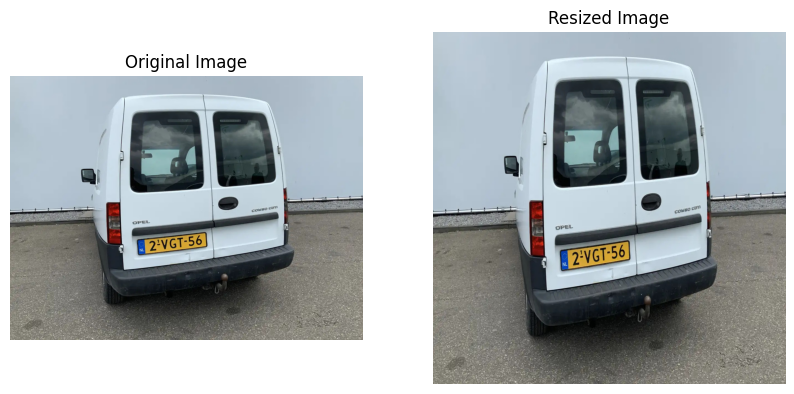

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

Przy użyciu OpenCV możemy też stosować przekształcenie afiniczne przestrzeni obrazów używając `cv2.getAffineTransform()`.

Funkcja ta oblicza przekształcenie afiniczne trzech par odpowiadających sobie punktów. Dla punktów $P_1  = (x_1, y_1), \ P_2 = (x_2, y_2),\ P_3 = (x_3, y_3)$ oraz ich odpowiedników  $P_1'  = (x_1', y_1'), \ P_2' = (x_2', y_2'),\ P_3' = (x_3', y_3')$ mamy $$ \begin{bmatrix} x_i' \\ y_i' \end{bmatrix} = M \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}$$ dla $i = 0, 1, 2$, gdzie $M$ jest macierzą przejścia. Następnie funkcja `cv2.warpAffine()` przekształca obraz oryginalny używając macierzy przejścia jako
$$dst(x, y) = src(M_{11} x + M_{12} y + M_{13}, M_{21} x + M_{22} y + M_{23}),$$
gdzie $src$ oznacza oryginalny obraz, a $dst$ wyjściowy.

![test](images/affine_demo.jpg)

In [46]:
# Define three points in the source image
rows, cols, ch = resized_img.shape
pts1 = np.float32([[0,0], [300,0], [0,300]])

# Define where these points should be in the output image
pts2 = np.float32([[200,100], [400,100], [100,350]])
pts3 = np.float32([[0,0], [300,0], [100,400]])

# Get the affine transformation matrices
M_1 = cv2.getAffineTransform(pts1, pts2)
M_2 = cv2.getAffineTransform(pts1, pts3)

# Apply first affine transformation
affine_transformed_one = cv2.warpAffine(resized_img, M_1, (cols, rows))

# Apply second affine transformation
affine_transformed_two = cv2.warpAffine(resized_img, M_2, (cols, rows))

Wyświetlmy porównanie obrazu przed i po transformacjach

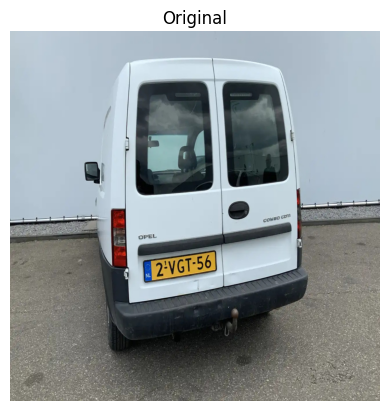

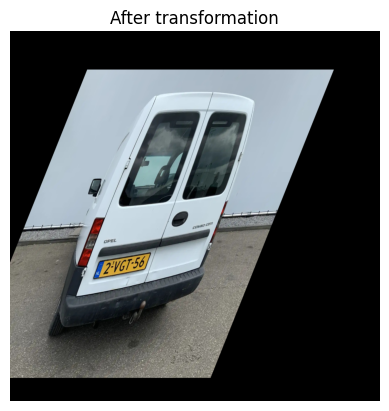

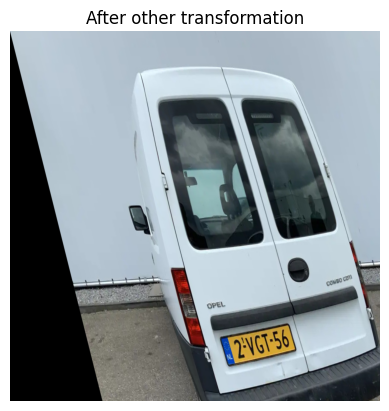

In [47]:
plt.plot()
plt.title('Original')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

plt.plot()
plt.title('After transformation')
plt.imshow(affine_transformed_one)
plt.axis('off')
plt.show()

plt.plot()
plt.title('After other transformation')
plt.imshow(affine_transformed_two)
plt.axis('off')
plt.show()

Dopuszczalne są też przekształcenia perspektywy. W tym celu potrzebne jest wyspecyfikowanie czterech punktów z pierwotnego obrazu i odpowiadających im punktów z docelowego obrazu.

![przykładowa transformacja](images/perspective_demo.png)

Funkcja `getPerspectiveTranform()` oblicza $M$ - macierz przejścia dla przekształcenia perspektywy. Dla punktów $P_i=(x_i, y_i),\ P_i'=(x_i', y_i')$, gdzie $i = 1,2,3,4$ rozwiązuje równanie macierzowe
$$\begin{bmatrix} t_i x_i' \\ t_i y_i' \\ t_i \end{bmatrix} = M \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix},$$
gdzie $t_i$ są skalarami dla $i = 1, 2, 3, 4$. 

Następnie funkcja `cv2.warpPerspective()` przekształca obraz oryginalny używając macierzy przejścia jako
$$dst(x, y) = src \left( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}}, \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right),$$
gdzie $src$ oznacza oryginalny obraz, a $dst$ wyjściowy.

In [71]:
# Define four points in the source image
pts1 = np.float32([[360,50], [840,50], [300,800], [900,800]])

# Define where these points should be in the output image
pts2 = np.float32([[0,0], [1000,0], [0,1000], [1000,1000]])

# Get the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
perspective_transformed = cv2.warpPerspective(img_rgb, M, (0, 0))

Wyświetlmy porównanie zdjęć

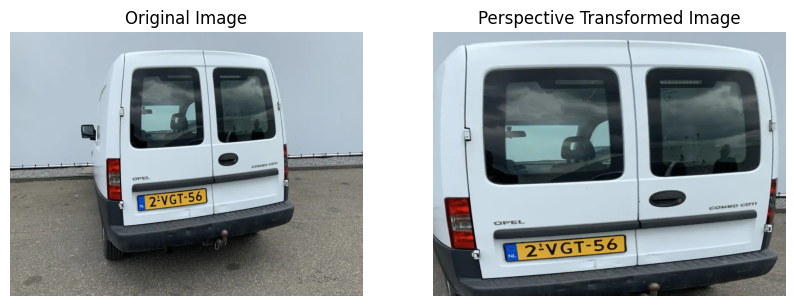

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Perspective Transformed Image')
plt.imshow(perspective_transformed)
plt.axis('off')
plt.show()

Kolejną przydatną funkcją jest obrót obrazu o wybrany kąt. Przy pomocy `cv2.getRotationMatrix2D()` dostajemy macierz obrotu $M$ daną wzorem
$$M = \begin{bmatrix} \alpha & \beta & (1 - \alpha) \cdot c_x - \beta \cdot c_y \\ -\beta & \alpha & \beta \cdot c_x + (1 - \alpha) \cdot c_y \end{bmatrix},$$
gdzie $C = (c_x, c_y)$ jest punktem, wokół którego dokonujemy obrotu, na przykład sam środek zdjęcia, natomiast $\alpha$ i $\beta$ zależne są od kąta $\theta$ i współczynnika skali $\lambda$ jako
$$\alpha = \lambda \cdot \cos{\theta},$$
$$\beta = \lambda \cdot \sin{\theta}.$$

Taką macierz rotacji stosujemy do znanej nam już funkcji `cv2.warpAffince` otrzymując zmodyfikowany obraz.

In [159]:
# Load an image
img = cv2.imread('images/tire_demo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the rotation matrix
center = (cols / 2, rows / 2)
angle = 120
scale = 1
M = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_img = cv2.warpAffine(img_rgb, M, (cols, rows))

Wyświetlmy porównanie

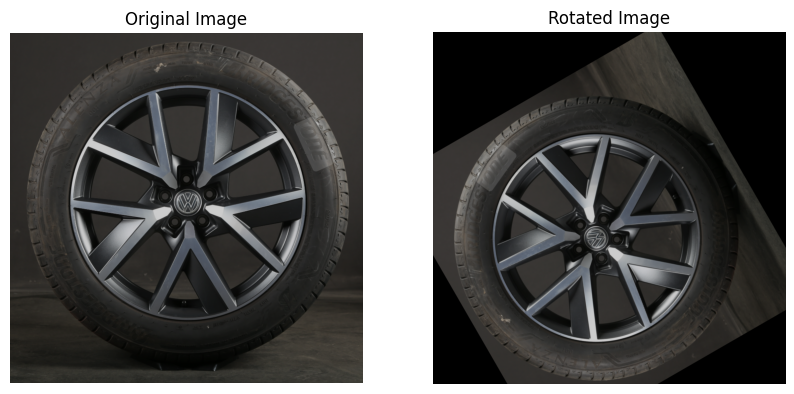

In [160]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Rotated Image')
plt.imshow(rotated_img)
plt.axis('off')
plt.show()

Ostatnią omawianą funkcjonalnością będzie zmiana układu współrzędnych obrazu z kartezjańskich (tj. para (x, y)) na biegunowe (tj. para $(\rho, \phi)$), posłuży nam do tego `cv2.warpPolar()`.

Chcemy opisać przekształcenie $dst(\rho, phi) = src(x, y)$, gdzie standardowo $scr$ oznacza oryginalny obraz, a $dst$ przekształcony.

Aby zwizualizować przekształcenie, zaczynamy od poniższego obrazu

![początkowy obraz](images/polar1_demo.png)

Zajmiemy się przekształceniem na zwykłe zmienne biegunowe, jest też możliwość zamiany na semilog-biegunowe, wzór na promień wygląda wtedy inaczej. W naszym przypadku będziemy ustawiali więc `semiLog=false`. Definiujemy wektor przesunięcia jako $I = (x - c_x, y - c_y)$, gdzie $C = (c_x, x_y)$ jest środkiem obrazu. Możemy wyznaczyć jego promień $angle (I)$ oraz długość $magnitude (I)$. Wtedy nowe współrzędne, kąt $\phi$ oraz promień $\rho$ definiujemy jako

$$ \phi - K angle \cdot angle(I), $$

$$ \rho = K lin \cdot magnitude(I), $$

gdzie $K angle = \frac{src_H}{2 \pi},\ K lin = \frac{src_W}{max_R} $ przy wysokości oryginalnego obrazu $src_{H}$, szerokości $src_{W}$ oraz promieniowi otaczającego koła do przekształcenia $max_{R}$. Przekształcony obraz powinien wyglądać następująco:


![płaski obraz](images/polar2_demo.png)

Przejdźmy do kodu i stwórzmy przykładową transformację:

In [163]:
src = cv2.imread("images/polar1_demo.png")

# src_h, src_w
h = src.shape[0]
w = src.shape[1]

# max_R
max_radius = min(w, h) / 2

# C = (c_x, c_y)
center = ((w - 150 ) // 2, h // 2)

# normal polar coordinates (semiLog = false)
flags = cv2.WARP_POLAR_LINEAR | cv2.WARP_FILL_OUTLIERS

dst = cv2.warpPolar(src, (260, 740), center, max_radius, flags)

cv2.imwrite("images/diy_polar.png", dst)

True

Wyświetlmy zmieniony obraz

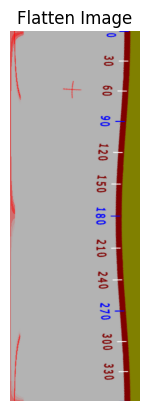

In [162]:
plt.title('Flatten Image')
plt.imshow(dst)
plt.axis('off')
plt.show()